In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 7 Use 50 points sampled uniformly
in x in the interval (-1, 1) and the corresponding values of f (x) for the following functions:
1. f(x) = x^2
2. f(x) = sin(x)
3. f(x) = |x|
4. f(x) = H(x) (Heaviside step function)


a) Train a two layer neural network with 3 hidden units with tanh activation and linear output units for each funciton


b) Plot the output of the NN (and the output of each hidden unit if available)


c) Do the same using ReLU

In [32]:
#1 f(x) = x^2
x = np.random.uniform(-1, 1, 50)
# sort x 
x = np.sort(x)
y1 = x**2
y2 = np.sin(x)
y3 = np.abs(x)
y4 = np.heaviside(x, 1)

# function names
f_names = ['x^2', 'sin(x)', '|x|', 'H(x)']

In [33]:
# create function to plot all
def plot_all(nns, x, ys):
    plt.figure(figsize=(12, 8))
    for i, nn in enumerate(nns):
        plt.subplot(2, 2, i+1)
        plt.scatter(x, ys[i])
        plt.plot(x, nn.predict(x.reshape(-1, 1)), color='red')
        plt.title(f'f(x) = {f_names[i]}')
    plt.show()

In [34]:
# train the neural network (3 hidden units), with tanh activation and linear output units
from sklearn.neural_network import MLPRegressor

# reshape the data
x = x.reshape(-1, 1)

# train the neural network
nn1 = MLPRegressor(hidden_layer_sizes=(3,), activation='tanh', solver='lbfgs', max_iter=1000)
nn1.fit(x, y1)

nn2 = MLPRegressor(hidden_layer_sizes=(3,), activation='tanh', solver='lbfgs', max_iter=1000)
nn2.fit(x, y2)

nn3 = MLPRegressor(hidden_layer_sizes=(3,), activation='tanh', solver='lbfgs', max_iter=1000)
nn3.fit(x, y3)

nn4 = MLPRegressor(hidden_layer_sizes=(3,), activation='tanh', solver='lbfgs', max_iter=1000)
nn4.fit(x, y4)


MLPRegressor(activation='tanh', hidden_layer_sizes=(3,), max_iter=1000,
             solver='lbfgs')

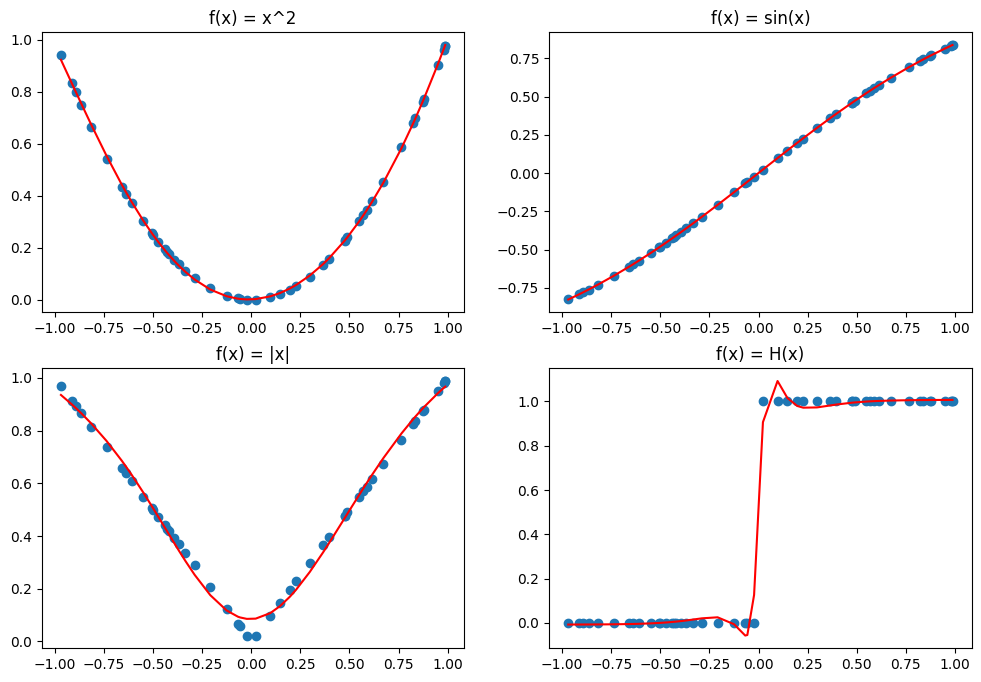

In [35]:
plot_all([nn1, nn2, nn3, nn4], x, [y1, y2, y3, y4])

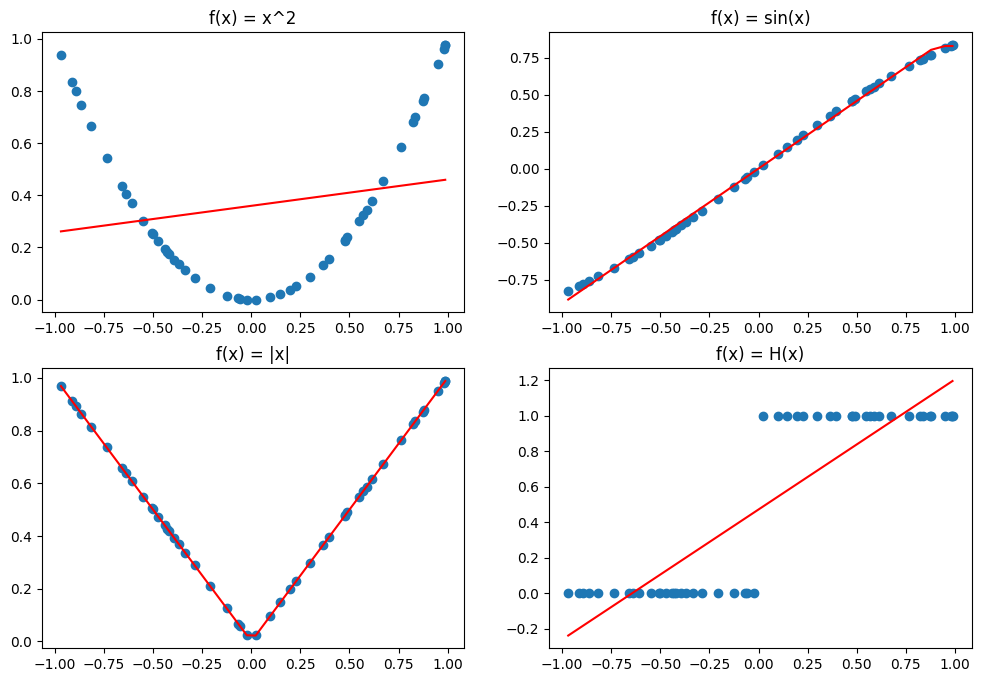

In [37]:
# train using RELU
nn1 = MLPRegressor(hidden_layer_sizes=(3,), activation='relu', solver='lbfgs', max_iter=1000)
nn1.fit(x, y1)

nn2 = MLPRegressor(hidden_layer_sizes=(3,), activation='relu', solver='lbfgs', max_iter=1000)
nn2.fit(x, y2)

nn3 = MLPRegressor(hidden_layer_sizes=(3,), activation='relu', solver='lbfgs', max_iter=1000)
nn3.fit(x, y3)

nn4 = MLPRegressor(hidden_layer_sizes=(3,), activation='relu', solver='lbfgs', max_iter=1000)
nn4.fit(x, y4)

plot_all([nn1, nn2, nn3, nn4], x, [y1, y2, y3, y4])

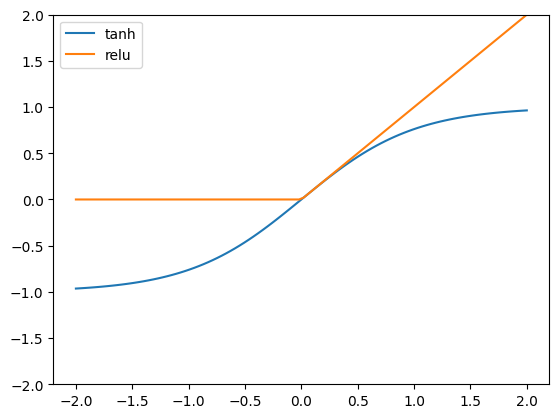

In [42]:
# plot the Relu and tanh function
x = np.linspace(-2, 2, 100)
plt.plot(x, np.tanh(x), label='tanh')
plt.plot(x, np.maximum(x, 0), label='relu')
plt.ylim(-2, 2)
plt.legend()
plt.show()


# 12 Perform an analysis for the MNIST dataset using a neural network

In [54]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [44]:
# which model to use
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical



In [45]:
# preprocess the data
x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [46]:
# create the model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))



C:\environments\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8798 - loss: 0.4259 - val_accuracy: 0.9575 - val_loss: 0.1390
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9649 - loss: 0.1177 - val_accuracy: 0.9665 - val_loss: 0.1095
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9766 - loss: 0.0792 - val_accuracy: 0.9732 - val_loss: 0.0894
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9837 - loss: 0.0536 - val_accuracy: 0.9738 - val_loss: 0.0847
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9872 - loss: 0.0416 - val_accuracy: 0.9762 - val_loss: 0.0790
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9902 - loss: 0.0325 - val_accuracy: 0.9748 - val_loss: 0.0794
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9913 - loss: 0.0267 - val_accuracy: 0.9777 - val_loss: 0.0775
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9939 - loss: 0.0214 - 

In [47]:
# evaluate the model
model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9752 - loss: 0.0932


[0.08100629597902298, 0.9782000184059143]

In [48]:
# make predictions
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


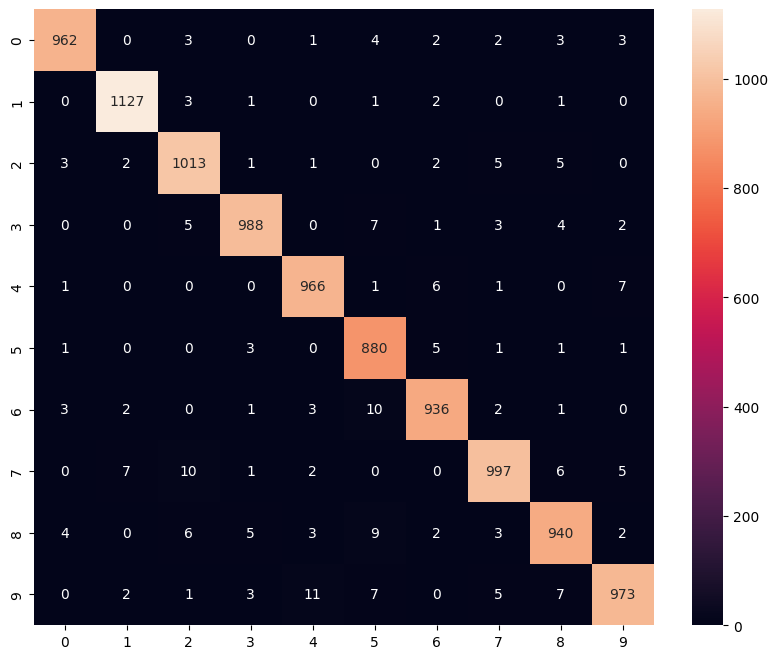

In [49]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

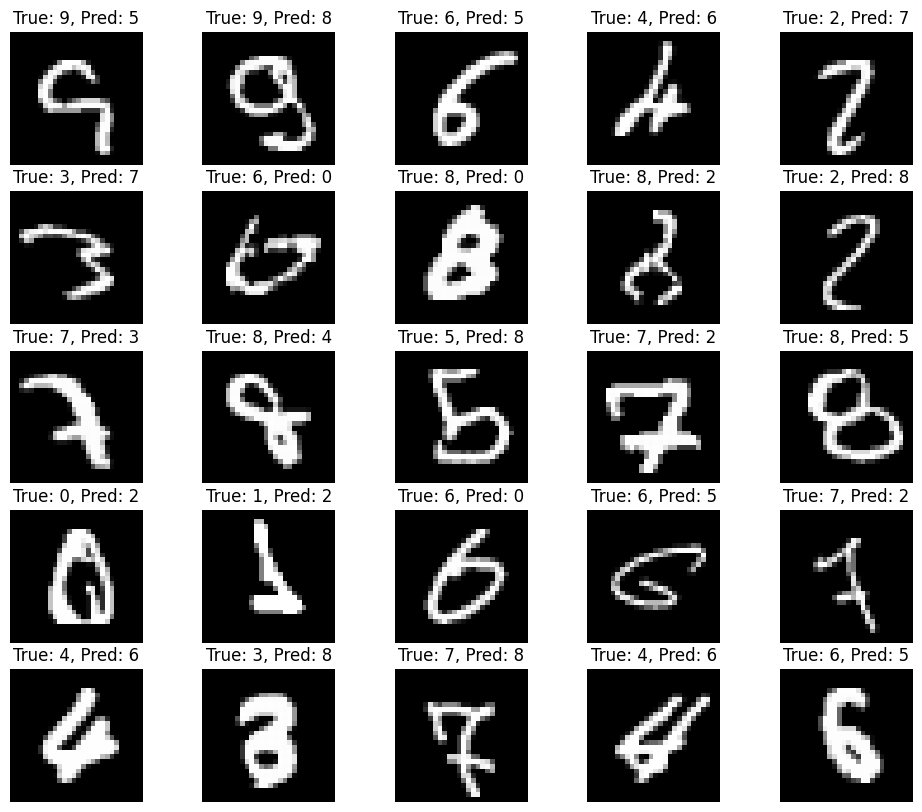

In [50]:
# show misclassified images
misclassified = np.where(np.argmax(y_test, axis=1) != y_pred)[0]

plt.figure(figsize=(12, 10))
for i, idx in enumerate(misclassified[:25]):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'True: {np.argmax(y_test[idx])}, Pred: {y_pred[idx]}')
    plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy

In [ ]:

# Normalizing and reshaping the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [ ]:

# Network parameters
input_shape = x_train.shape[1]
latent_dim = 2  # Dimensionality of the latent space

# Encoder model
inputs = Input(shape=(input_shape,), name='encoder_input')
x = Dense(128, activation='relu')(inputs)
z = Dense(latent_dim, name='latent_vector')(x)

# Decoder model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(128, activation='relu')(latent_inputs)
outputs = Dense(input_shape, activation='sigmoid')(x)

# Autoencoder model
encoder = Model(inputs, z, name='encoder')
decoder = Model(latent_inputs, outputs, name='decoder')
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')

# Autoencoder configuration
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Training the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


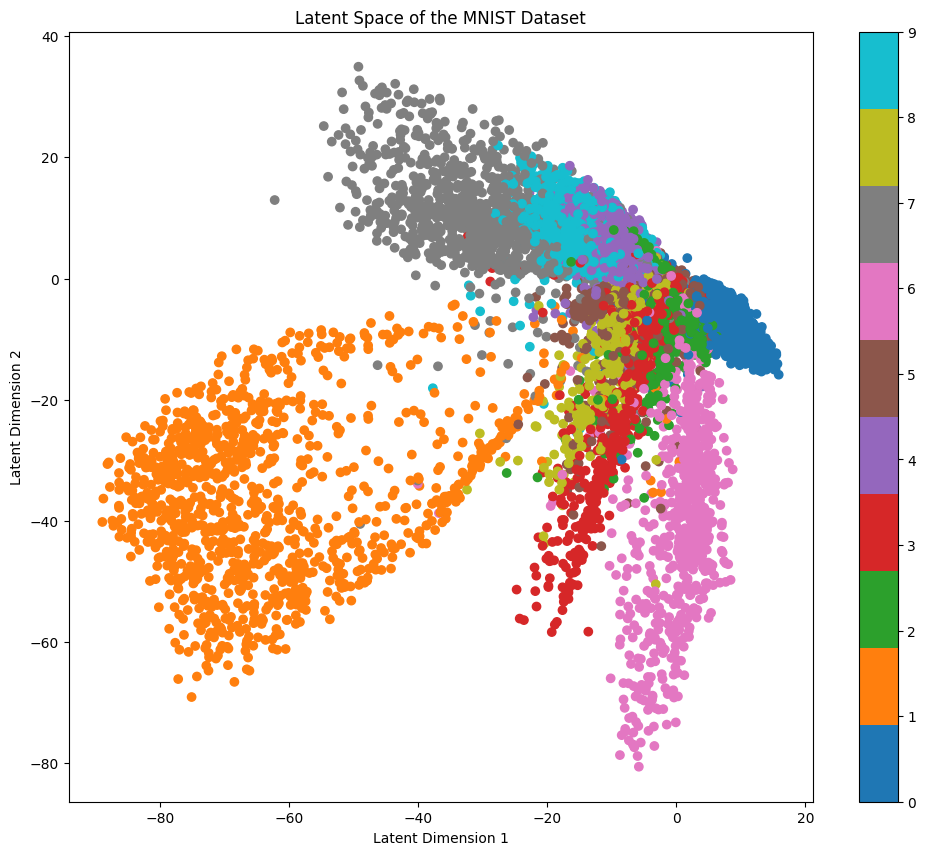

In [57]:

# Display the latent space
z_test = encoder.predict(x_test)
plt.figure(figsize=(12, 10))
plt.scatter(z_test[:, 0], z_test[:, 1], c=y_test, cmap='tab10')
plt.colorbar()
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Latent Space of the MNIST Dataset")
plt.show()


In [58]:

# Network parameters
input_shape = x_train.shape[1]
latent_dim = 3  # Dimensionality of the latent space

# Encoder model
inputs = Input(shape=(input_shape,), name='encoder_input')
x = Dense(128, activation='relu')(inputs)
z = Dense(latent_dim, name='latent_vector')(x)

# Decoder model
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(128, activation='relu')(latent_inputs)
outputs = Dense(input_shape, activation='sigmoid')(x)

# Autoencoder model
encoder = Model(inputs, z, name='encoder')
decoder = Model(latent_inputs, outputs, name='decoder')
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')

# Autoencoder configuration
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Training the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Functional)            │ (None, 3)              │       100,867 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Functional)            │ (None, 784)            │       101,648 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 202,515 (791.07 KB)

 Trainable params: 202,515 (791.07 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.3479 - val_loss: 0.2112
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2073 - val_loss: 0.1963
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1951 - val_loss: 0.1892
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1886 - val_loss: 0.1855
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1852 - val_loss: 0.1833
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1830 - val_loss: 0.1817
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1810 - val_loss: 0.1801
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1797 - val_loss: 0.1790
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1782 - val_loss: 0.1781
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1772 - val_loss: 0.1769
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1766 - val_loss: 0.1763
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


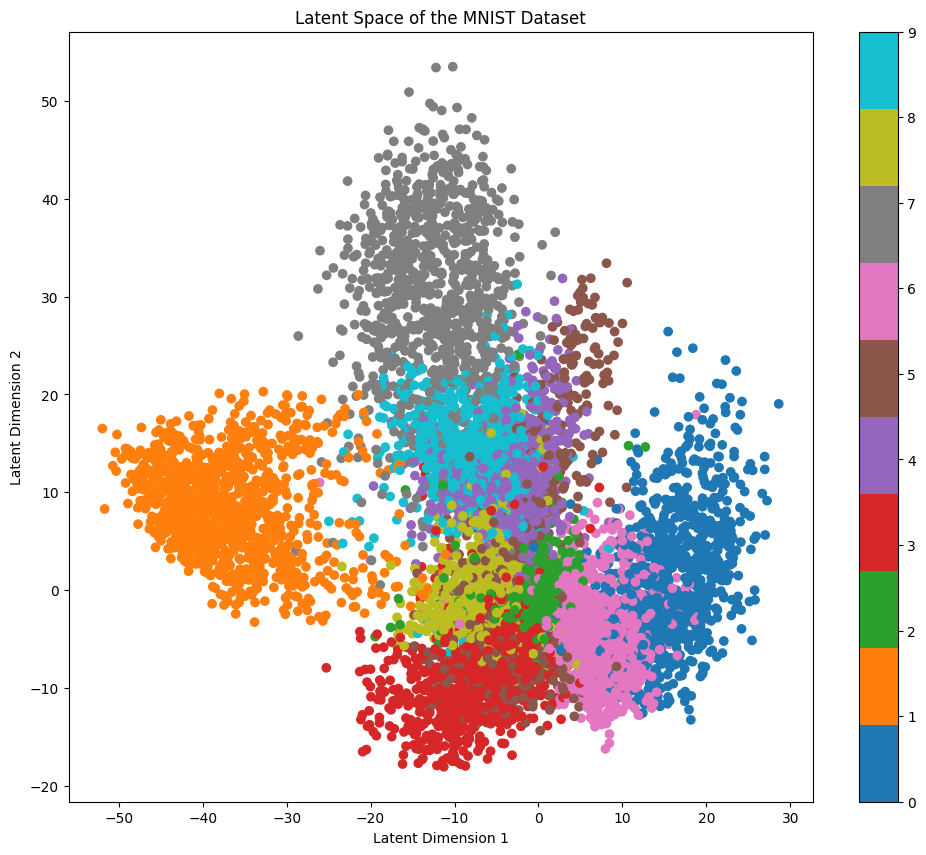

In [59]:

# Display the latent space
z_test = encoder.predict(x_test)
plt.figure(figsize=(12, 10))
plt.scatter(z_test[:, 0], z_test[:, 1], c=y_test, cmap='tab10')
plt.colorbar()
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Latent Space of the MNIST Dataset")
plt.show()


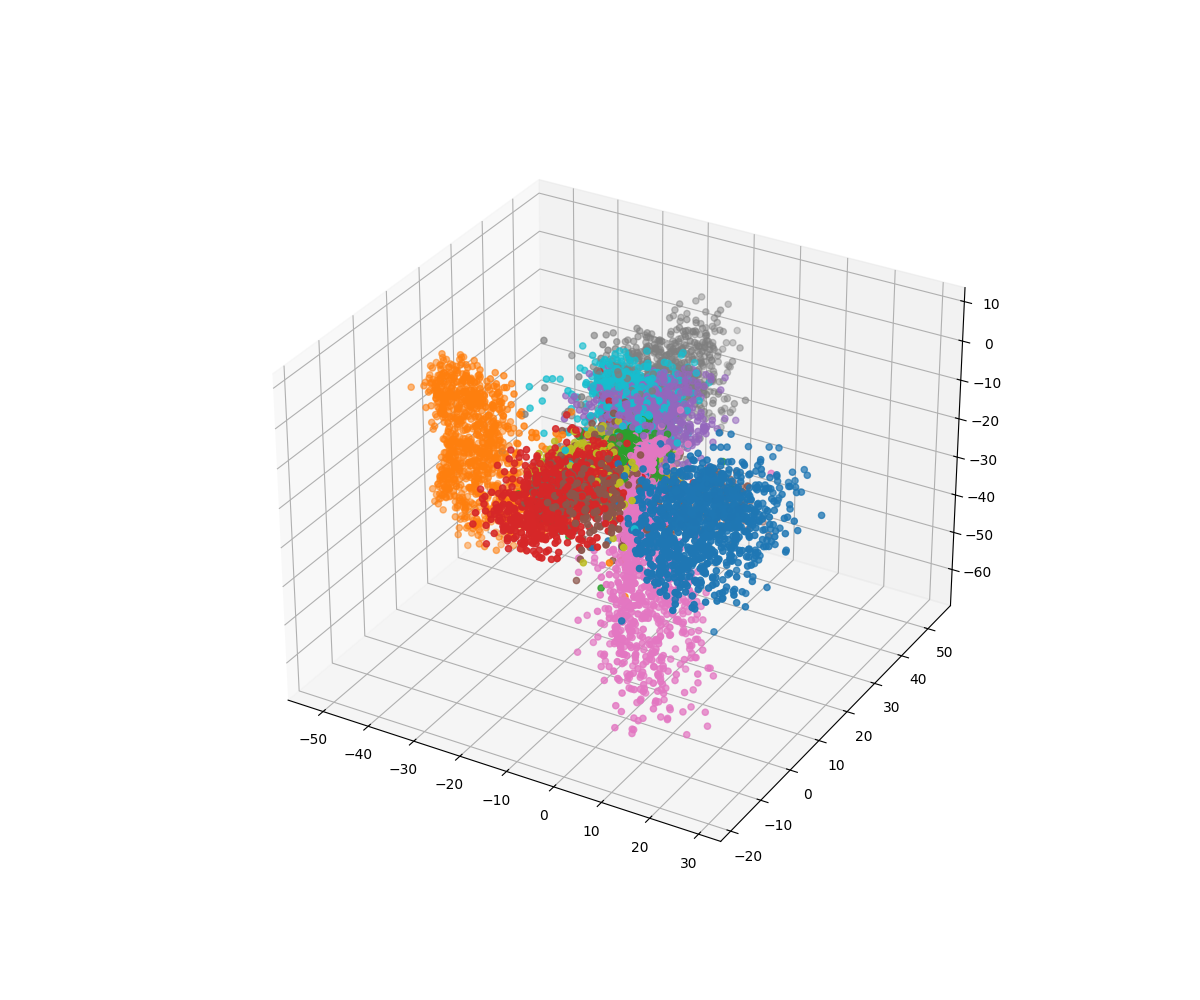

In [60]:
# plot 3d plot
from mpl_toolkits.mplot3d import Axes3D

%matplotlib widget

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(z_test[:, 0], z_test[:, 1], z_test[:, 2], c=y_test, cmap='tab10')
plt.show()